# Predicting Steam Game Popularity 
We aim to find out what makes a game popular for new inde game developers to start work on

In [251]:
### Imports ###
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [252]:
### Import data ###
df = pd.read_csv("steam_games.csv")
# df.shape is (83646, 46)
df

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,...,29018,753,6078,352,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,...,0,0,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,...,35557,1327,1163,977,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832
3,271590,Grand Theft Auto V,2015-04-13,17,0.00,1,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,...,12898,590,6910,235,133571,"{'Open World': 31998, 'Action': 23177, 'Multip...",87,1643791,92,16181
4,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",NaN,...,16213,578,3016,331,68162,"{'FPS': 9689, 'PvP': 9073, 'e-sports': 9026, '...",85,1091695,77,10566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83641,1745960,Circuit Breaker,2021-10-21,0,4.99,1,Circuit Breaker is a turn-based strategy game ...,Circuit Breaker is a turn-based strategy game ...,"In the cyber-future of 2009, the most popular ...",NaN,...,0,0,0,0,0,"{'Strategy': 72, 'Casual': 48, 'PvE': 47, 'Sin...",-1,-1,-1,-1
83642,1888920,Chess vs Chat,2022-08-09,0,3.99,0,Chess Vs Chat allows streamers to host chess m...,Chess Vs Chat allows streamers to host chess m...,Allow your chatters to actively participate an...,NaN,...,0,0,0,0,0,"{'Indie': 31, 'Strategy': 21, 'Puzzle': 11, 'M...",-1,-1,-1,-1
83643,2166420,Orbtangle,2022-10-28,0,1.99,0,Orbtangle is a simplistic puzzle game which re...,Orbtangle is a simplistic puzzle game which re...,Orbtangle is a simplistic puzzle game which re...,NaN,...,0,0,0,0,0,"{'Puzzle': 54, 'Colorful': 46, 'Relaxing': 44,...",-1,-1,-1,-1
83644,1456260,Flashlight,2021-10-25,0,2.99,0,Play with Friends Play with or against your fr...,Play with Friends Play with or against your fr...,"Salvage scrap, build defenses, and rank-up to ...",NaN,...,0,0,0,0,0,"{'Top-Down Shooter': 138, 'Rogue-lite': 132, '...",-1,-1,-1,-1


In [253]:
df.columns
# ['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
# 'detailed_description', 'about_the_game', 'short_description',
# 'reviews', 'header_image', 'website', 'support_url', 'support_email',
# 'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
# 'achievements', 'recommendations', 'notes', 'supported_languages',
# 'full_audio_languages', 'packages', 'developers', 'publishers',
# 'categories', 'genres', 'screenshots', 'movies', 'user_score',
# 'score_rank', 'positive', 'negative', 'estimated_owners',
# 'average_playtime_forever', 'average_playtime_2weeks',
# 'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
# 'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
# 'num_reviews_recent']

Index(['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
       'num_reviews_recent'],
      dtype='object')

# Feature Analysis
### Features
'release_date', 'required_age', 'price', 'dlc_count',
'reviews', 'header_image', 'website', 'support_url', 'support_email',
'windows', 'mac', 'linux', 
'achievements', 'recommendations',  'supported_languages',
'full_audio_languages', 'packages', 'developers', 'publishers',
'categories', 'genres', 'screenshots', 'tags',


### Target metrics
'estimated_owners',
'median_playtime_forever',
'user_score', 
'pct_pos_total'

In [254]:
features = ['name','release_date', 'required_age', 'price', 'dlc_count',
            'header_image', 'website', 'support_url', 'support_email',
            'windows', 'mac', 'linux', 'achievements', 'recommendations',  
            'supported_languages', 'full_audio_languages', 'packages', 
            'publishers', 'categories', 'genres', 'tags']
targets = ['user_score']
df1 = df[features]
df1[targets] = df[targets]


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24644\1265275020.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[targets] = df[targets]


### Target analysis

In [255]:
### Custom column pos_fraction ###

# "num_reviews_total" does not match up with sum of pos and neg reviews
df["total_reviews"] = df["positive"] + df["negative"]
df["pos_fraction"] = df["positive"] / df["total_reviews"]
df[["name","positive","negative","pos_fraction"]].head(10)
df1['pos_fraction'] = df['pos_fraction']

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24644\3525674078.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pos_fraction'] = df['pos_fraction']


### Fix Date Data Type

In [256]:
df1["release_date"] = pd.to_datetime(df1['release_date'])
df1["release_date"]

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24644\65474722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["release_date"] = pd.to_datetime(df1['release_date'])


0       2012-08-21
1       2017-12-21
2       2013-07-09
3       2015-04-13
4       2015-12-01
           ...    
83641   2021-10-21
83642   2022-08-09
83643   2022-10-28
83644   2021-10-25
83645   2018-06-15
Name: release_date, Length: 83646, dtype: datetime64[ns]

### Check overlap in tags, catagories, genres

In [257]:
temp_df = df1[['name', 'genres', 'categories', 'tags']]

# Assuming temp_df is already defined and you want to get tags for 'Counter-Strike 2'
tags_series = temp_df[temp_df['name'] == 'Counter-Strike 2']['tags']
cat_series = temp_df[temp_df['name'] == 'Counter-Strike 2']['categories']

# Print the entire set of tags
for i in tags_series:
    print(i)
for j in cat_series:
    print(j)

{'FPS': 90076, 'Shooter': 64786, 'Multiplayer': 61798, 'Competitive': 52887, 'Action': 47165, 'Team-Based': 46061, 'e-sports': 43144, 'Tactical': 41033, 'First-Person': 39082, 'PvP': 34156, 'Online Co-Op': 33708, 'Co-op': 30037, 'Strategy': 29902, 'Military': 28512, 'War': 27826, 'Difficult': 25814, 'Trading': 25487, 'Realistic': 25261, 'Fast-Paced': 25188, 'Moddable': 6453}
['Multi-player', 'Cross-Platform Multiplayer', 'Steam Trading Cards', 'Steam Workshop', 'In-App Purchases', 'Valve Anti-Cheat enabled', 'Stats', 'Remote Play on Phone', 'Remote Play on Tablet', 'Remote Play on TV']


### Clean Nan

In [258]:
import numpy as np
df1.isna().sum()
nan_col =  'website', 'support_url', 'support_email' 
df1[['website', 'support_url', 'support_email']] = df1[['website', 'support_url', 'support_email']].notna().astype(int)
df1[['website', 'support_url', 'support_email']]

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24644\3571005498.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['website', 'support_url', 'support_email']] = df1[['website', 'support_url', 'support_email']].notna().astype(int)


,website,support_url,support_email
0,1,0,0
1,1,1,0
2,1,0,0
3,1,1,0
4,1,1,0
...,...,...,...
83641,0,0,1
83642,0,0,1
83643,0,1,1
83644,0,0,1


### Tokenising non numeric features

In [259]:
df_int = df1.select_dtypes(include=['float64', 'int64'])
# corr_matrix = df_int.sample(500).corr()
# corr_matrix

print(df_int['pos_fraction'].describe())
print(df_int['pos_fraction'].isnull().sum())  # Check for missing values
print((df_int['pos_fraction'] == 0).sum())    # Check for zero values

count    69683.000000
mean         0.750985
std          0.239175
min          0.000000
25%          0.636364
50%          0.809060
75%          0.936262
max          1.000000
Name: pos_fraction, dtype: float64
13963
2161


In [260]:
### Drop all 0 and NaN
df_filtered = df_int[(df_int['pos_fraction'] != 0) & (df_int['pos_fraction'].notna())]
corr_matrix = df_filtered.corr()

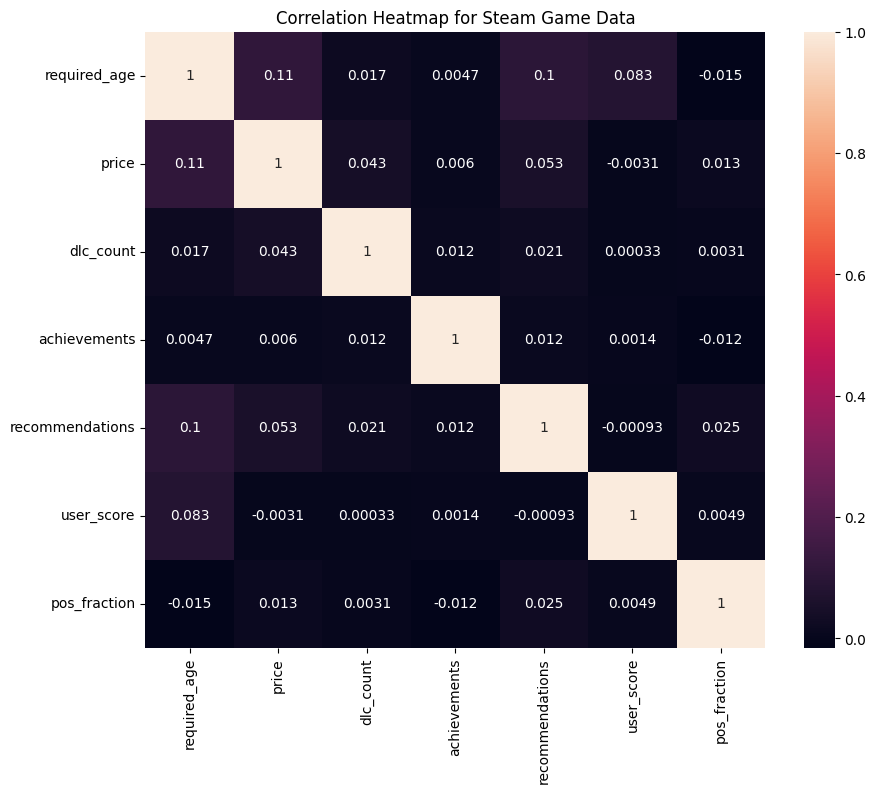

In [261]:
### No correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap for Steam Game Data")
plt.show()

In [262]:
df1.dtypes

name                            object
release_date            datetime64[ns]
required_age                     int64
price                          float64
dlc_count                        int64
header_image                    object
website                          int32
support_url                      int32
support_email                    int32
windows                           bool
mac                               bool
linux                             bool
achievements                     int64
recommendations                  int64
supported_languages             object
full_audio_languages            object
packages                        object
publishers                      object
categories                      object
genres                          object
tags                            object
user_score                       int64
pos_fraction                   float64
dtype: object

### Analysing Bool Features

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24644\2924407397.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Not Supported", "Supported"])
c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24644\2924407397.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes

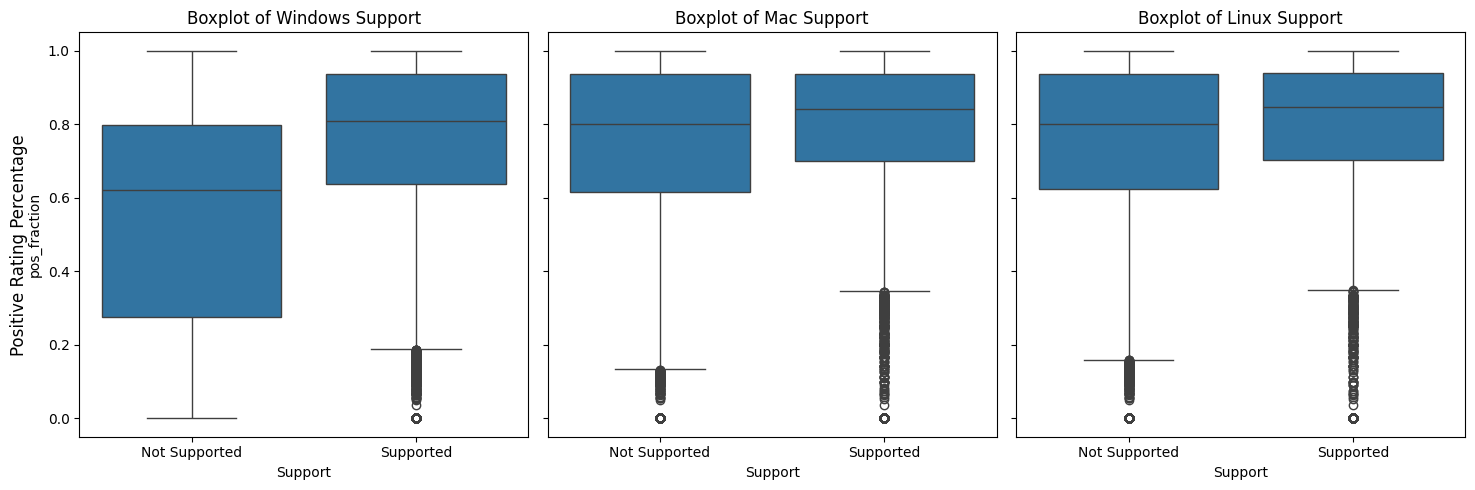

In [263]:
### Analysing relationship with supported OS ###

os_columns = ["windows", "mac", "linux"]
fig, axes = plt.subplots(1, len(os_columns), figsize=(15, 5), sharey=True)

for i, col in enumerate(os_columns):
    sns.boxplot(x=df1[col], y=df1["pos_fraction"], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col.capitalize()} Support")
    axes[i].set_xlabel("Support")
    axes[i].set_xticklabels(["Not Supported", "Supported"])

fig.supylabel("Positive Rating Percentage")
plt.tight_layout()
plt.show()

### Analysing Non Numeric Features

In [264]:
### Tokenising ###
non_numeric = ["supported_languages", "full_audio_languages", "packages", "publishers", "categories", "genres", "tags"]

In [265]:
## Tokenize columns: convert each entry to the count of unique tokens
tokenize_columns = ['supported_languages', 'full_audio_languages', 'publishers', 'genres', 'packages', 'categories']
for col in tokenize_columns:
    df1[col] = df1[col].apply(lambda x: len(set(x.split(','))) if isinstance(x, str) else len(set(x)) if isinstance(x, list) else 0)
df1['tags'] = df1['tags'].apply(lambda x: len(set(x)) if isinstance(x, list) else 0)

df1.info()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24644\237464040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(lambda x: len(set(x.split(','))) if isinstance(x, str) else len(set(x)) if isinstance(x, list) else 0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83646 entries, 0 to 83645
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  83643 non-null  object        
 1   release_date          83646 non-null  datetime64[ns]
 2   required_age          83646 non-null  int64         
 3   price                 83646 non-null  float64       
 4   dlc_count             83646 non-null  int64         
 5   header_image          83646 non-null  object        
 6   website               83646 non-null  int32         
 7   support_url           83646 non-null  int32         
 8   support_email         83646 non-null  int32         
 9   windows               83646 non-null  bool          
 10  mac                   83646 non-null  bool          
 11  linux                 83646 non-null  bool          
 12  achievements          83646 non-null  int64         
 13  recommendations 

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24644\237464040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tags'] = df1['tags'].apply(lambda x: len(set(x)) if isinstance(x, list) else 0)


count    69683.000000
mean         0.750985
std          0.239175
min          0.000000
25%          0.636364
50%          0.809060
75%          0.936262
max          1.000000
Name: pos_fraction, dtype: float64
13963
2161


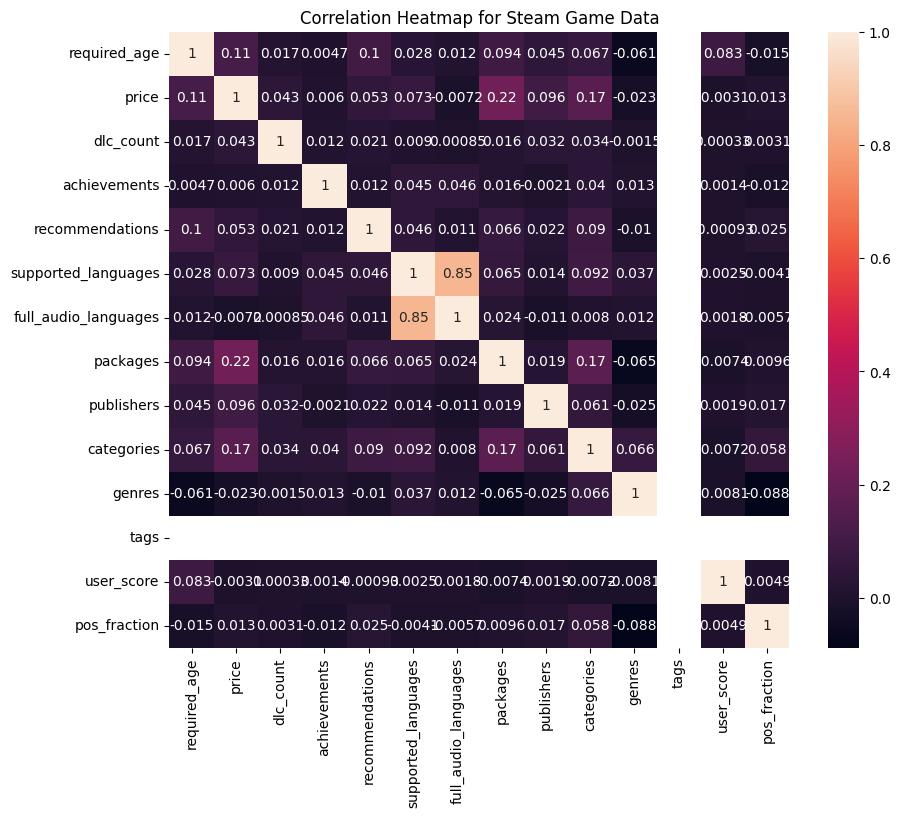

In [266]:
df_int = df1.select_dtypes(include=['float64', 'int64'])
# corr_matrix = df_int.sample(500).corr()
# corr_matrix

print(df_int['pos_fraction'].describe())
print(df_int['pos_fraction'].isnull().sum())  # Check for missing values
print((df_int['pos_fraction'] == 0).sum()) 
### Drop all 0 and NaN
df_filtered = df_int[(df_int['pos_fraction'] != 0) & (df_int['pos_fraction'].notna())]
corr_matrix = df_filtered.corr()

### No correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap for Steam Game Data")
plt.show()

In [267]:
df[['user_score', 'score_rank', 'positive', 'negative']]

,user_score,score_rank,positive,negative
0,0,NaN,7024836,1029779
1,0,NaN,1379580,981860
2,0,NaN,1832477,406030
3,0,NaN,1557234,236827
4,0,NaN,1094330,190046
...,...,...,...,...
83641,0,NaN,1,0
83642,0,NaN,2,1
83643,0,NaN,5,0
83644,0,NaN,3,0


In [268]:
df1['median_playtime_forever'] = df['median_playtime_forever']
df1['peak_ccu'] = df['peak_ccu']
df1['positive'] = df['positive']
df1['negative'] = df['negative']
df1['estimated_owners'] = df['estimated_owners']
df[['lowest_estimate', 'highest_estimate']] = df['estimated_owners'].str.split(' - ', expand=True)
df1[['lowest_estimate', 'highest_estimate']] = df1['estimated_owners'].str.split(' - ', expand=True)

# Convert the new columns to integers
df['lowest_estimate'] = df['lowest_estimate'].astype(int)
df['highest_estimate'] = df['highest_estimate'].astype(int)
df1['lowest_estimate'] = df1['lowest_estimate'].astype(int)
df1['highest_estimate'] = df1['highest_estimate'].astype(int)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24644\2483875292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['median_playtime_forever'] = df['median_playtime_forever']
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24644\2483875292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['peak_ccu'] = df['peak_ccu']
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24644\2483875292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [269]:
df1 = df1[df1["positive"]>=1000]
df1 = df1[df1["negative"]>=1000]
df1.shape

(1841, 30)

count    1841.000000
mean       19.430440
std        17.306266
min         0.000000
25%         4.490000
50%        17.990000
75%        29.990000
max        69.990000
Name: price, dtype: float64
0
363


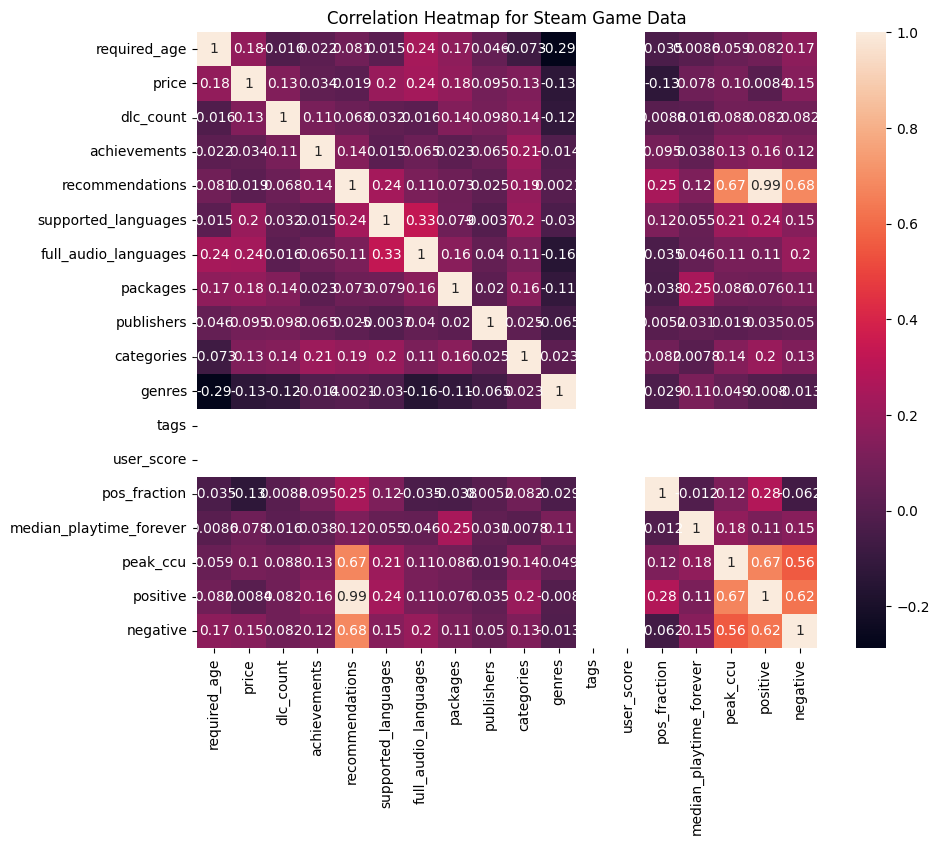

In [270]:
df_int = df1.select_dtypes(include=['float64', 'int64'])
# corr_matrix = df_int.sample(500).corr()
# corr_matrix

target_col = 'price'

print(df_int[target_col].describe())
print(df_int[target_col].isnull().sum())  # Check for missing values
print((df_int[target_col] == 0).sum()) 
### Drop all 0 and NaN
df_filtered = df_int[(df_int[target_col] != 0) & (df_int[target_col].notna())]
corr_matrix = df_filtered.corr()

### No correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap for Steam Game Data")
plt.show()

In [271]:
df.columns

Index(['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
       'num_reviews_recent', 'total_reviews', 'pos_fraction',
       'lowest_estimate', 'highest_estimate'],
      dtype='object')